In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
df = pd.read_csv('data/banijay_op1data_content_ratings_twitter.csv', compression='zip')

In [29]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', 'Unnamed: 0.3', 'Unnamed: 0.4'], axis=1, inplace=True)

In [30]:
df.corr()

,fragment,Kdh%,Kdh000,Zadl%,possibly_sensitive,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,Engagement_rate
fragment,1.000000,-0.021645,-0.014527,0.102542,NaN,-0.022111,0.005346,0.002136,-0.014155,NaN,NaN,NaN,NaN,-0.002083
Kdh%,-0.021645,1.000000,0.887954,0.545930,NaN,0.028358,-0.006298,0.017617,0.015167,NaN,NaN,NaN,NaN,0.013941
Kdh000,-0.014527,0.887954,1.000000,0.509317,NaN,0.023089,-0.002179,0.015359,0.013208,NaN,NaN,NaN,NaN,0.012985
Zadl%,0.102542,0.545930,0.509317,1.000000,NaN,0.037842,0.023186,0.026936,0.036249,NaN,NaN,NaN,NaN,0.032668
possibly_sensitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
public_metrics.retweet_count,-0.022111,0.028358,0.023089,0.037842,NaN,1.000000,0.415829,0.937966,0.599022,NaN,NaN,NaN,NaN,0.886417
public_metrics.reply_count,0.005346,-0.006298,-0.002179,0.023186,NaN,0.415829,1.000000,0.469639,0.862638,NaN,NaN,NaN,NaN,0.752117
public_metrics.like_count,0.002136,0.017617,0.015359,0.026936,NaN,0.937966,0.469639,1.000000,0.612024,NaN,NaN,NaN,NaN,0.930455
public_metrics.quote_count,-0.014155,0.015167,0.013208,0.036249,NaN,0.599022,0.862638,0.612024,1.000000,NaN,NaN,NaN,NaN,0.830547
author.public_metrics.followers_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
Target_group_dummies = pd.get_dummies(df, prefix='TG', columns=['Target Group'])

In [32]:
Target_group_dummies = Target_group_dummies.loc[Target_group_dummies['Ratings Type'] == 'totaal']

In [33]:
df_for_the_model = Target_group_dummies.loc[:, ['TG_boodschapper_20_49',
                                                'TG_boodschapper_25_54',
                                                 'Kdh000']]
df_for_model_hosts = Target_group_dummies.loc[:, ['hosts']].values

In [34]:
X = df_for_the_model.drop('Kdh000', axis=1).values
y = df_for_the_model['Kdh000'].values

In [35]:
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(df_for_model_hosts)

X = np.c_[X, X_transform]

In [36]:
# first split into train and test (use all data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# split into train and validation (use only train data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [37]:
scores = []
for depth in [2, 4, 6, 8]:
    dt = DecisionTreeRegressor(max_depth=depth,
                               min_samples_leaf=0.1,
                               random_state=3)
    dt.fit(X_valid, y_valid)
    y_pred_dt = dt.predict(X_train)
    score = dt.score(X_train, y_train)
    scores.append(score)
print(scores)

[0.08736416181076523, 0.08741524476415052, 0.08741524476415052, 0.08741524476415052]


In [38]:
reg = LinearRegression()
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.1, random_state=3)

In [39]:
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=5)

In [60]:
cv_scores = cross_val_score(reg, X_test, y_test, cv=kf)
print(cv_scores)
print(round(np.mean(cv_scores), 3), round(np.std(cv_scores), 5))
print(np.quantile(cv_scores, [0.025, 0.975]))

[0.10136376 0.1045784  0.09993544 0.10255715 0.10162634]
0.102 0.00153
[0.10007827 0.10437627]


In [43]:
print("Accuracy score of Linear Regression", round(reg.score(X_test, y_test), 3))
print("Accuracy score of Decision tree Regression", round(dt.score(X_test, y_test), 3))

Accuracy score of Linear Regression 0.102
Accuracy score of Decision tree Regression 0.034


In [44]:
print("MSE of Linear Regression:", round(MSE(y_test, y_pred_reg, squared=False), 2))
print("MSE of Decision Tree Regression:", round(MSE(y_test, y_pred_dt, squared=False), 2))

MSE of Linear Regression: 319.66
MSE of Decision Tree Regression: 331.57


In [45]:
def LinReg(X, y):
    beta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
    return beta

In [46]:
LinReg(X, y)

array([-261.30734961, -235.60553579,  325.00002479,  307.03741338,
        348.42807901,  297.9656278 ,  245.1194149 ,  444.53198854,
        381.16758059,  379.99183431,  313.94103417,  441.48228931,
        313.73804461,  257.73822859,  315.18869329,  255.28120165,
        281.36143361,  326.70393679,  302.86134635,  348.36286904,
        304.46997077,  291.1551319 ,  299.98041382,  449.36755018,
        288.23259525,  442.3406878 ,  354.87562003,  308.55490542,
        258.88878394,  340.66071637,  407.71987906,  361.0654645 ,
        278.14543276,  298.42350699,  337.22493807,  286.55896332,
        352.40923737,  309.24299177,  301.73888123,  377.69022294,
        502.10237547,  343.90106168,  341.9593703 ,  494.35209452,
        354.16167729,  348.21136635,  276.51888848,   82.21386074,
        489.32415294,  366.40224291,  422.75734802,  468.18013727,
        320.52414509,  365.47623021,  280.57435436,  359.54898435])

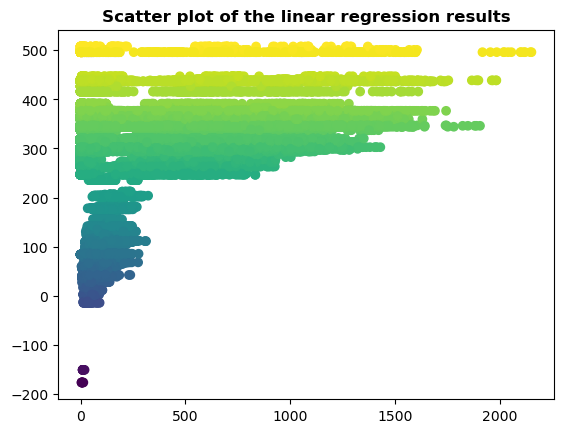

In [58]:
color = y_pred_reg
plt.scatter(y_test, y_pred_reg, c=color)
plt.title('Scatter plot of the linear regression results', fontdict={'fontweight':'bold'})
plt.savefig('Visualizations/Scatter_plot_of_the_linear_regression.png')
plt.show()

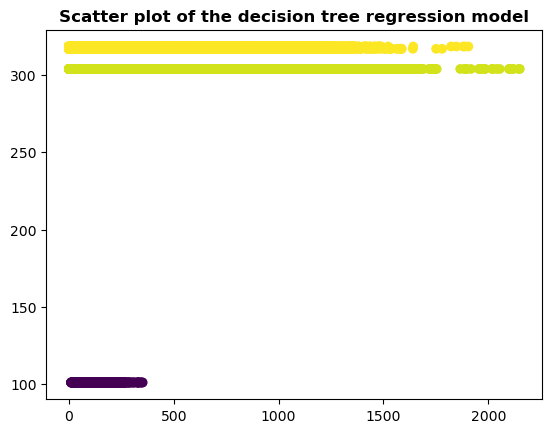

In [59]:
color = y_pred_dt
plt.scatter(y_test, y_pred_dt, c=color)
plt.title('Scatter plot of the decision tree regression model', fontdict={'fontweight':'bold'})
plt.savefig('Visualizations/Scatter_plot_of_the_decision_tree_regression_regression.png')
plt.show()